## 2D Burgers' Equation


$$\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} + v \frac{\partial u}{\partial y}  = \nu (\frac{\partial^2 u}{\partial x^2} +  \frac{\partial^2 u}{\partial y^2}) $$

$$\frac{\partial v}{\partial t} + u \frac{\partial v}{\partial x} + v \frac{\partial v}{\partial y}  = \nu (\frac{\partial^2 v}{\partial x^2} +  \frac{\partial^2 v}{\partial y^2}) $$

-----------------------------------------------------------------------------

$$\frac{u_{i,j}^{n+1}-u_{i,j}^n}{\Delta t} + u_{i,j}^{n} \frac{u_{i,j}^{n} - u_{i-1,j}^{n}}{\Delta x} + v_{i,j}^{n} \frac{u_{i,j}^n - u_{i,j-1}^n}{\Delta y} = \nu ~(\frac{ u_{i+1,j}^{n} - 2 u_{i,j}^n + u_{i-1,j}^{n}}{\Delta x^2} + \frac{ u_{i,j+1}^{n} - 2 u_{i,j}^n + u_{i,j-1}^{n}}{\Delta y^2}) $$

## $$u_{i,j}^{n+1} = u_{i,j}^n - \frac{\Delta t}{\Delta x} + u_{i,j}^{n} (u_{i,j}^{n} - u_{i-1,j}^{n}) - \frac{\Delta t}{\Delta y} v_{i,j}^{n} (u_{i,j}^n - u_{i,j-1}^n) +  \nu \frac{\Delta t}{\Delta x^2}( u_{i+1,j}^{n} - 2 u_{i,j}^n + u_{i-1,j}^{n}) + \nu \frac{\Delta t}{\Delta y^2} (u_{i,j+1}^{n} - 2 u_{i,j}^n + u_{i,j-1}^{n})$$

-----------------------------------------------------------------------------

$$\frac{v_{i,j}^{n+1}-v_{i,j}^n}{\Delta t} + u_{i,j}^{n} \frac{v_{i,j}^{n} - v_{i-1,j}^{n}}{\Delta x} + v_{i,j}^{n} \frac{v_{i,j}^n - v_{i,j-1}^n}{\Delta y} = \nu ~(\frac{ v_{i+1,j}^{n} - 2 v_{i,j}^n + v_{i-1,j}^{n}}{\Delta x^2} + \frac{ v_{i,j+1}^{n} - 2 v_{i,j}^n + v_{i,j-1}^{n}}{\Delta y^2}) $$

## $$v_{i,j}^{n+1} = v_{i,j}^n - \frac{\Delta t}{\Delta x} + u_{i,j}^{n} (v_{i,j}^{n} - v_{i-1,j}^{n}) - \frac{\Delta t}{\Delta y} v_{i,j}^{n} (v_{i,j}^n - v_{i,j-1}^n) +  \nu \frac{\Delta t}{\Delta x^2}( v_{i+1,j}^{n} - 2 v_{i,j}^n + v_{i-1,j}^{n}) + \nu \frac{\Delta t}{\Delta y^2} (v_{i,j+1}^{n} - 2 v_{i,j}^n + v_{i,j-1}^{n})$$

$$ CFL = \nu \frac{\Delta t}{\Delta x^{2}} $$
$$ \Delta t = CFL * \frac{\Delta x^{2}}{\nu}   $$

In [24]:
import numpy as np
from matplotlib import pyplot, cm
from mpl_toolkits.mplot3d import Axes3D


In [25]:
## Variables

def burgerEq(grid_size,time):
    
    nx = grid_size
    ny = grid_size
    nt = time
    
    dx = 2 / (nx - 1)
    dy = 2 / (ny - 1)
    
    nu = 0.01
    
    CFL = 0.0009
    dt = CFL * dx**2 / nu
    
    x = np.linspace(0, 2, nx)
    y = np.linspace(0, 2, ny)
    
    u = np.ones((nx,ny))
    v = np.ones((nx,ny))
    
    un = np.ones((nx,ny))
    vn = np.ones((nx,ny))  
    comb = np.ones((ny, nx))
    
    ###Assign initial conditions

    ##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
    u[int(.5 / dx):int(1 / dx + 1),int(.5 / dy):int(1 / dy + 1)] = 2 
   
    ##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
    v[int(.5 / dx):int(1 / dx + 1),int(.5 / dy):int(1 / dy + 1)] = 2
    
    ## plot for IC
    
    fig = pyplot.figure(figsize = (11,7), dpi = 100)
    
#     ax = fig.gca(projection = '3d')
#     X,  Y = np.meshgrid(x, y)
#     ax.plot_surface(X, Y, u[:], cmap=cm.viridis, rstride=1, cstride=1 )
#     ax.plot_surface(X, Y, v[:], cmap=cm.viridis, rstride=1, cstride=1 )
#     ax.set_xlabel('$x$')
#     ax.set_ylabel('$y$')
    
    for n in range(nt+1):
        un = u.copy()
        vn = v.copy()
    
        u[1:-1, 1:-1] = (un[1:-1, 1:-1] -
                     dt / dx * un[1:-1, 1:-1] * 
                     (un[1:-1, 1:-1] - un[1:-1, 0:-2]) - 
                     dt / dy * vn[1:-1, 1:-1] * 
                     (un[1:-1, 1:-1] - un[0:-2, 1:-1]) + 
                     nu * dt / dx**2 * 
                     (un[1:-1,2:] - 2 * un[1:-1, 1:-1] + un[1:-1, 0:-2]) + 
                     nu * dt / dy**2 * 
                     (un[2:, 1:-1] - 2 * un[1:-1, 1:-1] + un[0:-2, 1:-1]))
    
        v[1:-1, 1:-1] = (vn[1:-1, 1:-1] - 
                         dt / dx * un[1:-1, 1:-1] *
                         (vn[1:-1, 1:-1] - vn[1:-1, 0:-2]) -
                         dt / dy * vn[1:-1, 1:-1] * 
                        (vn[1:-1, 1:-1] - vn[0:-2, 1:-1]) + 
                         nu * dt / dx**2 * 
                         (vn[1:-1, 2:] - 2 * vn[1:-1, 1:-1] + vn[1:-1, 0:-2]) +
                         nu * dt / dy**2 *
                         (vn[2:, 1:-1] - 2 * vn[1:-1, 1:-1] + vn[0:-2, 1:-1]))    
    u[0,:] = 1
    u[-1,:] = 1
    u[:,0] = 1
    u[:,-1] = 1
    
    v[0,:] = 1
    v[-1,:] = 1
    v[:,0] = 1
    v[:,-1] = 1
    
    fig = pyplot.figure(figsize = (11,7), dpi = 100)
    ax = fig.gca(projection = '3d')
    x = np.linspace(0, 2, nx)
    y = np.linspace(0, 2, ny)
    X, Y = np.meshgrid(x, y)
    ax.plot_surface(X, Y, u[:], cmap = cm.viridis, rstride = 1, cstride =1)
    ax.plot_surface(X, Y, u[:], cmap = cm.viridis, rstride = 1, cstride =1)    
    ax.set_xlabel('$x$') 
    ax.set_ylabel('$y$')   
    

<Figure size 1100x700 with 0 Axes>

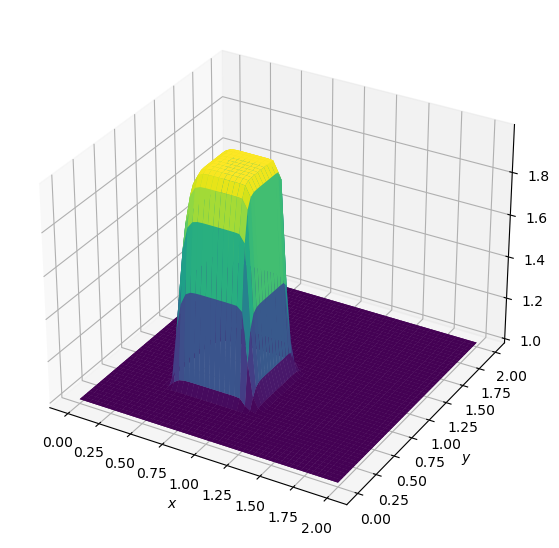

In [26]:
burgerEq(51,120)

In [54]:
A = np.array([[1,2,3],[4,5,6],[7,8,9]])

A[1,1]



5

In [50]:
c = 5
d = 5
CC = np.ones([c,d])
CC


array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [49]:
c

5